# Problem Statement
To predict whether the person survived sinking from the features in the given data.

# Perform standard imports

In [1]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix

# Data import

In [2]:
train_data = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
test_data = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [3]:
train_data.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [4]:
train_data.shape
test_data.shape

(264, 10)

In [5]:
#identifying categorical columns 
cat_cols = train_data.select_dtypes(include=object).columns.values
print('The non-numerical columns in the training dataset are: ')
print(cat_cols)

The non-numerical columns in the training dataset are: 
['sex' 'class' 'deck' 'embark_town' 'alone']


# Exploratory analysis

In [6]:
print("Total probability of survival for all passengers -->  {:.4f}".format(train_data.survived.mean()))

Total probability of survival for all passengers -->  0.3876


In [7]:
print("Survival probability for female in first class: {:.4f}".format(len(train_data[(train_data["survived"]==1) & (train_data["sex"]=="female") & (train_data["class"]=='First')].index) / len(train_data[(train_data["sex"]=="female") & (train_data["class"]=='First')].index)))
print("Survival probability for female in second class:{:.4f}".format(len(train_data[(train_data["survived"]==1) & (train_data["sex"]=="female") & (train_data["class"]=='Second')].index) / len(train_data[(train_data["sex"]=="female") & (train_data["class"]=='Second')].index)))
print("Survival probability for female in third class: {:.4f}".format(len(train_data[(train_data["survived"]==1) & (train_data["sex"]=="female") & (train_data["class"]=='Third')].index) / len(train_data[(train_data["sex"]=="female") & (train_data["class"]=='Third')].index)))
print("")
print("Survival probability for male in first class: {:.4f}".format(len(train_data[(train_data["survived"]==1) & (train_data["sex"]=="male") & (train_data["class"]=='First')].index) / len(train_data[(train_data["sex"]=="male") & (train_data["class"]=='First')].index)))
print("Survival probability for male in second class: {:.4f}".format(len(train_data[(train_data["survived"]==1) & (train_data["sex"]=="male") & (train_data["class"]=='Second')].index) / len(train_data[(train_data["sex"]=="male") & (train_data["class"]=='Second')].index)))
print("Survival probability for male in third class: {:.4f}".format(len(train_data[(train_data["survived"]==1) & (train_data["sex"]=="male") & (train_data["class"]=='Third')].index) / len(train_data[(train_data["sex"]=="male") & (train_data["class"]=='Third')].index)))

Survival probability for female in first class: 0.9710
Survival probability for female in second class:0.9091
Survival probability for female in third class: 0.5591

Survival probability for male in first class: 0.3778
Survival probability for male in second class: 0.1111
Survival probability for male in third class: 0.1290


In [8]:
print("Average fare of all passengers: {:.4f}".format(train_data.fare.mean()))
# How much you have to pay for the different classes in average?? (price unit is £/pounds)
print("Average fare for First class:  {:.4f}".format(train_data[train_data["class"]=='First'].fare.mean()))
print("Average fare for Second class:  {:.4f}".format(train_data[train_data["class"]=='Second'].fare.mean()))
print("Average fare for Third class:  {:.4f}".format(train_data[train_data["class"]=='Third'].fare.mean()))

Average fare of all passengers: 34.3854
Average fare for First class:  89.0598
Average fare for Second class:  20.5946
Average fare for Third class:  14.0282


In [9]:
# average age of all passengers
print("Average age of all passengers: {0:.1f}".format(train_data.age.mean()))
print("Age of oldest passenger: {:.1f}".format(train_data.age.max()))
print("Age of youngest passenger: {:.1f}".format(train_data.age.min()))

Average age of all passengers: 29.6
Age of oldest passenger: 80.0
Age of youngest passenger: 0.8


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No. of survivors and dead')

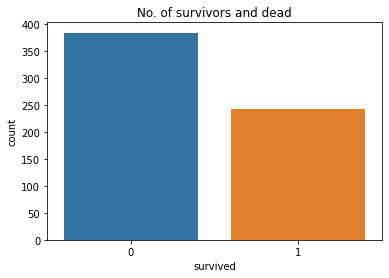

In [10]:
sns.countplot(train_data.survived)
plt.title("No. of survivors and dead")

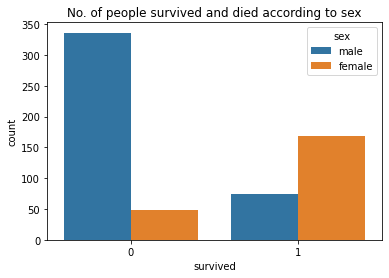

In [11]:
sns.countplot(x="survived", hue="sex", data=train_data)
plt.title("No. of people survived and died according to sex")
plt.show()

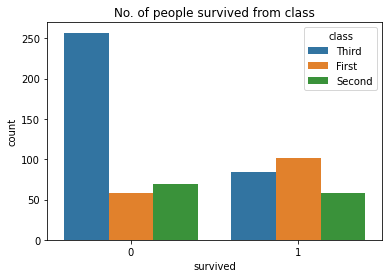

In [12]:
sns.countplot(x="survived", hue="class", data=train_data)
plt.title("No. of people survived from class")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


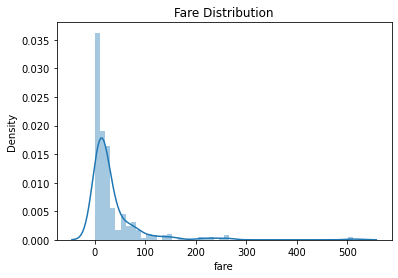

In [13]:
#fare distribution
sns.distplot(train_data.fare)
plt.title('Fare Distribution')
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


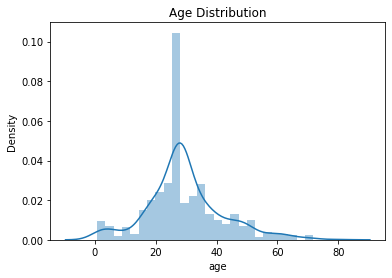

In [14]:
#fare distribution
sns.distplot(train_data.age)
plt.title('Age Distribution')
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


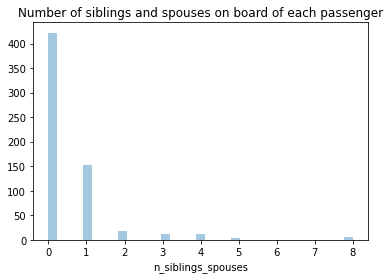

In [15]:
sns.distplot(train_data["n_siblings_spouses"], kde=False)
plt.title("Number of siblings and spouses on board of each passenger")
plt.show()

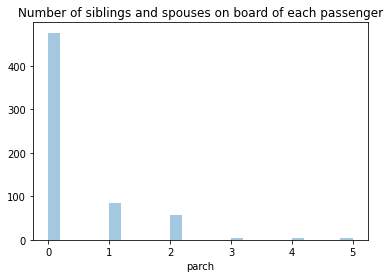

In [16]:
sns.distplot(train_data.parch, kde=False)
plt.title("Number of siblings and spouses on board of each passenger")
plt.show()

# Preparing data

In [17]:
def dataframe_to_arrays(dataframe,normalize = True):
    # Make a copy of the original dataframe
    df = dataframe.copy(deep=True)
    input_cols = df.columns.values[1:]
    output_cols = df.columns.values[:1]
    # Convert non-numeric categorical columns to numbers
    cat_cols = df.select_dtypes(include=object).columns.values
    for col in cat_cols:
        df[col] = df[col].astype('category').cat.codes #give numerical codes
    if normalize:
        for col in input_cols:
            df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    # Extract input & outputs as numpy arrays
    X = df[input_cols].to_numpy()
    y = df[output_cols].to_numpy().reshape(-1,1)
    return X,y

In [18]:
Xtrain,ytrain = dataframe_to_arrays(train_data)
Xtest,ytest = dataframe_to_arrays(test_data)

In [19]:
#Converting to tensors
X_train = torch.FloatTensor(Xtrain)
X_test = torch.FloatTensor(Xtest)
y_train = torch.FloatTensor(ytrain)
y_test = torch.FloatTensor(ytest)
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 627
Labels: tensor([0., 1.])
Counts: tensor([384, 243])


In [20]:
#Creating tensor dataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [21]:
#split train set into train set and validation set
split = 0.1
val_size = int(split*len(train_dataset))
train_size = len(train_dataset) - val_size
train_ds, val_ds = random_split(train_dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(565, 62)

In [22]:
#batch size for data loading
batch_size = 32
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [23]:
number_of_features = (Xtrain.shape[1])
number_of_outputs = (ytrain.shape[1])
number_of_features,number_of_outputs

(9, 1)

# Performing regression modelling with Pytorch

In [24]:
def accuracy(preds, targets):
    return torch.tensor(torch.sum(preds.round() == targets).item() / len(preds))

## Linear regression model

### Creating the model

In [25]:
class Titanic_Model_1(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions 
        y_pred = self(inputs)        
        # Calcuate loss
        loss = F.mse_loss(y_pred, targets)                          
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        y_pred = self(inputs)       
        # Calcuate loss
        loss = F.mse_loss(y_pred, targets)                           
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() 
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch+1,result['val_loss']))

In [26]:
model = Titanic_Model_1(number_of_features,number_of_outputs)
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([1, 9]) torch.Size([1])


[Parameter containing:
 tensor([[-0.3135,  0.1761, -0.3325,  0.1749,  0.3216,  0.0171, -0.0834, -0.3094,
           0.1834]], requires_grad=True),
 Parameter containing:
 tensor([-0.2123], requires_grad=True)]

In [27]:
train_data.columns[1:]

Index(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck',
       'embark_town', 'alone'],
      dtype='object')

## Training the model

In [28]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit(epochs, lr, model, train_loader, val_loader, weight_decay = 0, grad_clip = None,opt_func=torch.optim.SGD):
    history = []
    #Setting up optimizer
    optimizer = opt_func(model.parameters(), lr, weight_decay = weight_decay)
    #Learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            #update parameters
            optimizer.step()
            #make gradient of all model parameters zero to avoid compounding
            optimizer.zero_grad()
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
            
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch,result,epochs)
        history.append(result)
    return history

In [29]:
result = evaluate(model, val_loader) 
print(result)

{'val_loss': 0.8798947334289551}


In [30]:
epochs = 100
lr = 0.1
grad_clip = 0.2
weight_decay = 1e-2
opt_func = torch.optim.SGD

history= fit(epochs, lr, model, train_loader, val_loader,weight_decay,grad_clip,opt_func)

Epoch [1], val_loss: 0.3569
Epoch [2], val_loss: 0.3274
Epoch [3], val_loss: 0.2543
Epoch [4], val_loss: 0.1863
Epoch [5], val_loss: 0.1432
Epoch [6], val_loss: 0.1236
Epoch [7], val_loss: 0.1166
Epoch [8], val_loss: 0.1189
Epoch [9], val_loss: 0.1204
Epoch [10], val_loss: 0.1190
Epoch [11], val_loss: 0.1204
Epoch [12], val_loss: 0.1348
Epoch [13], val_loss: 0.1437
Epoch [14], val_loss: 0.1430
Epoch [15], val_loss: 0.1223
Epoch [16], val_loss: 0.1142
Epoch [17], val_loss: 0.1159
Epoch [18], val_loss: 0.1333
Epoch [19], val_loss: 0.1238
Epoch [20], val_loss: 0.1159
Epoch [21], val_loss: 0.1153
Epoch [22], val_loss: 0.1256
Epoch [23], val_loss: 0.1238
Epoch [24], val_loss: 0.1248
Epoch [25], val_loss: 0.1257
Epoch [26], val_loss: 0.1275
Epoch [27], val_loss: 0.1247
Epoch [28], val_loss: 0.1215
Epoch [29], val_loss: 0.1378
Epoch [30], val_loss: 0.1270
Epoch [31], val_loss: 0.1413
Epoch [32], val_loss: 0.1172
Epoch [33], val_loss: 0.1203
Epoch [34], val_loss: 0.1346
Epoch [35], val_loss: 0

In [31]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plot_losses(history):
    train_losses = [x['train_loss'] for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-b')
    plt.plot(val_losses, '-r')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

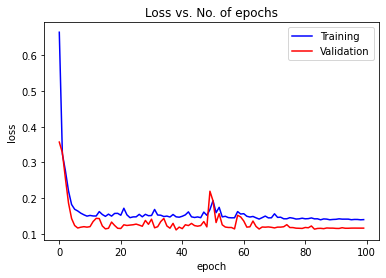

In [32]:
plot_losses(history)

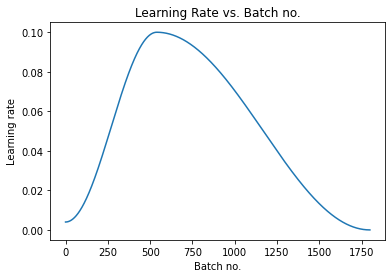

In [33]:
plot_lrs(history)

## Save model

In [34]:
result = evaluate(model, val_loader)
result

{'val_loss': 0.11625543981790543}

In [35]:
torch.save(model.state_dict(), 'titanic-linear.pth')

In [36]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.5110, -0.2263, -0.2314, -0.0679,  0.1927, -0.2293,  0.0064, -0.0431,
                       -0.0318]])),
             ('linear.bias', tensor([0.9917]))])

In [37]:
train_data.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

Comment: Weights from the model.state_dict() output show the importance of each input feature. 

## Predict on test data

In [38]:
def predict_single(input_data, model):
    input,target = input_data
    inputs = input.unsqueeze(0) #making (1,dim)
    predictions = model(input)                # fill this
    prediction = predictions[0].detach()
    print("Input:", np.array(input).tolist())
    print("Target:", int(np.array(target)))
    print("Prediction:", prediction)
    if prediction >= 0.5:
      print('The passenger survived!')
    else:
      print('Tha passenger did not survived...')

In [39]:
predict_single(train_ds[7],model)

Input: [0.0, 0.3438485860824585, 0.125, 0.0, 0.10122885555028915, 0.0, 0.4285714328289032, 0.6666666865348816, 0.0]
Target: 1
Prediction: tensor(0.8784)
The passenger survived!


In [40]:
##making muultiple predictions

def make_predictions(inputs,targets):
    result = list()
    targets = targets.flatten().numpy()
    for person in inputs:
        result.append(int(round(model(person).item(), 0)))
    accuracy = np.round(np.sum(result==targets)/len(targets) * 100,2)
    cm = confusion_matrix(result,targets)
    
    return accuracy,cm

In [41]:
test_acc,test_cm = make_predictions(X_test,y_test)
print('The accuracy of test set predictions is:',test_acc,'%')
train_acc,train_cm = make_predictions(X_train,y_train)
print('The accuracy of train set predictions is:',train_acc,'%')

The accuracy of test set predictions is: 75.0 %
The accuracy of train set predictions is: 81.18 %


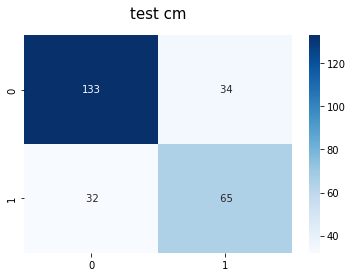

In [42]:
#visualize confusion matrix 
sns.heatmap(test_cm,annot=True,fmt='3.0f',cmap="Blues")
plt.title('test cm', y=1.05, size=15)
plt.show()

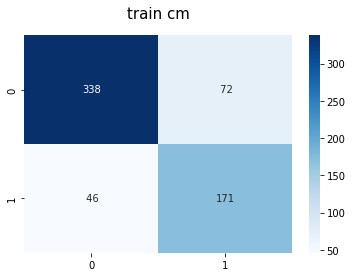

In [43]:
sns.heatmap(train_cm,annot=True,fmt='3.0f',cmap="Blues")
plt.title('train cm', y=1.05, size=15)
plt.show()

## Logistic regression model

### Creating the model

In [44]:
class Titanic_Model_2(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions 
        y_pred = self(inputs)        
        # Calcuate loss
        loss = F.binary_cross_entropy(y_pred, targets)        
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        y_pred = self(inputs)       
        # Calcuate loss
        loss = F.binary_cross_entropy(y_pred, targets) 
        # Calculate accuracy
        acc = accuracy(y_pred, targets)   
        return {'val_loss': loss.detach(),'val_acc':acc.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() 
        batch_acc = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean() 
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch+1, result['val_loss'], result['val_acc']))

In [45]:
model = Titanic_Model_2(number_of_features,number_of_outputs)
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([1, 9]) torch.Size([1])


[Parameter containing:
 tensor([[ 0.1378,  0.3147, -0.1334,  0.1345,  0.2561,  0.0348, -0.1930, -0.0782,
           0.0927]], requires_grad=True),
 Parameter containing:
 tensor([-0.2891], requires_grad=True)]

## Training the model

In [46]:
result = evaluate(model, val_loader) 
print(result)

{'val_loss': 0.6907971501350403, 'val_acc': 0.5833333730697632}


In [47]:
epochs = 100
lr = 0.1
grad_clip = 0.3
weight_decay = 1e-2
opt_func = torch.optim.SGD

history= fit(epochs, lr, model, train_loader, val_loader,weight_decay,grad_clip,opt_func)

Epoch [1], val_loss: 0.6652, val_acc: 0.5833
Epoch [2], val_loss: 0.6413, val_acc: 0.5677
Epoch [3], val_loss: 0.6190, val_acc: 0.5677
Epoch [4], val_loss: 0.5890, val_acc: 0.5844
Epoch [5], val_loss: 0.5560, val_acc: 0.6635
Epoch [6], val_loss: 0.5289, val_acc: 0.7583
Epoch [7], val_loss: 0.5074, val_acc: 0.7583
Epoch [8], val_loss: 0.4840, val_acc: 0.8052
Epoch [9], val_loss: 0.4663, val_acc: 0.8052
Epoch [10], val_loss: 0.4533, val_acc: 0.8052
Epoch [11], val_loss: 0.4449, val_acc: 0.8052
Epoch [12], val_loss: 0.4370, val_acc: 0.8052
Epoch [13], val_loss: 0.4294, val_acc: 0.8052
Epoch [14], val_loss: 0.4277, val_acc: 0.8052
Epoch [15], val_loss: 0.4240, val_acc: 0.8052
Epoch [16], val_loss: 0.4228, val_acc: 0.8052
Epoch [17], val_loss: 0.4208, val_acc: 0.8052
Epoch [18], val_loss: 0.4198, val_acc: 0.8052
Epoch [19], val_loss: 0.4202, val_acc: 0.8052
Epoch [20], val_loss: 0.4202, val_acc: 0.8052
Epoch [21], val_loss: 0.4184, val_acc: 0.8052
Epoch [22], val_loss: 0.4180, val_acc: 0.80

In [48]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plot_losses(history):
    train_losses = [x['train_loss'] for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-b')
    plt.plot(val_losses, '-r')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

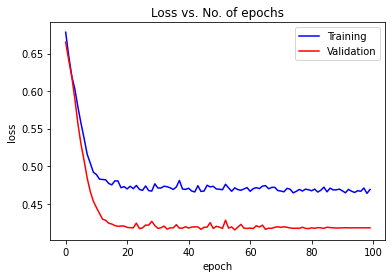

In [49]:
plot_losses(history)

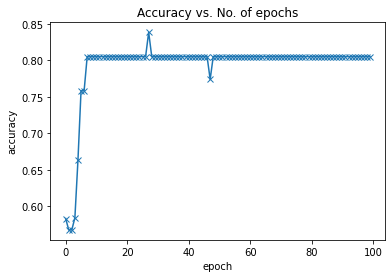

In [50]:
plot_accuracies(history)

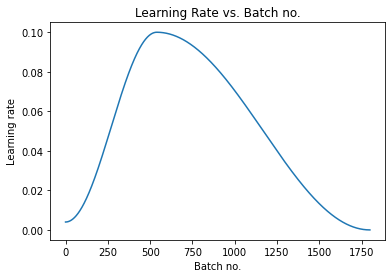

In [51]:
plot_lrs(history)

## Save model

In [52]:
result = evaluate(model, val_loader)
result

{'val_loss': 0.41779980063438416, 'val_acc': 0.8052083253860474}

In [53]:
torch.save(model.state_dict(), 'titanic-logistic.pth')

In [54]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-1.9702, -0.1245, -0.3111, -0.0102,  0.4012, -0.9045, -0.0055, -0.1390,
                       -0.0617]])),
             ('linear.bias', tensor([1.3971]))])

In [55]:
train_data.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

Comment: Weights from the model.state_dict() output show the importance of each input feature. 

## Predict on test data

In [56]:
def predict_single(input_data, model):
    input,target = input_data
    inputs = input.unsqueeze(0) #making (1,dim)
    predictions = model(input)                # fill this
    prediction = predictions[0].detach()
    print("Input:", np.array(input).tolist())
    print("Target:", int(np.array(target)))
    print("Prediction:", prediction)
    if prediction >= 0.5:
      print('The passenger survived!')
    else:
      print('Tha passenger did not survived...')

In [57]:
predict_single(train_ds[7],model)

Input: [0.0, 0.3438485860824585, 0.125, 0.0, 0.10122885555028915, 0.0, 0.4285714328289032, 0.6666666865348816, 0.0]
Target: 1
Prediction: tensor(0.7792)
The passenger survived!


In [58]:
##making muultiple predictions

def make_predictions(inputs,targets):
    result = list()
    targets = targets.flatten().numpy()
    for person in inputs:
        result.append(int(round(model(person).item(), 0)))
    accuracy = np.round(np.sum(result==targets)/len(targets) * 100,2)
    cm = confusion_matrix(result,targets)
    
    return accuracy,cm

In [59]:
test_acc,test_cm = make_predictions(X_test,y_test)
print('The accuracy of test set predictions is:',test_acc,'%')
train_acc,train_cm = make_predictions(X_train,y_train)
print('The accuracy of train set predictions is:',train_acc,'%')

The accuracy of test set predictions is: 74.24 %
The accuracy of train set predictions is: 80.54 %


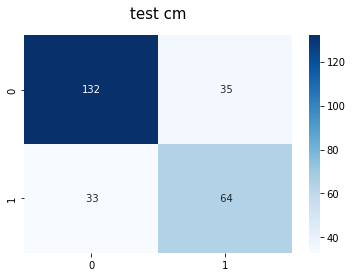

In [60]:
#visualize confusion matrix 
sns.heatmap(test_cm,annot=True,fmt='3.0f',cmap="Blues")
plt.title('test cm', y=1.05, size=15)
plt.show()

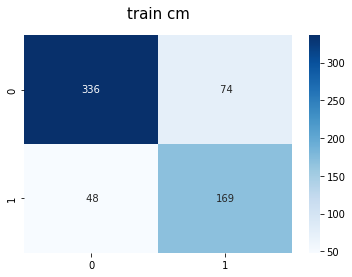

In [61]:
sns.heatmap(train_cm,annot=True,fmt='3.0f',cmap="Blues")
plt.title('train cm', y=1.05, size=15)
plt.show()